# Pandas
Pandas is a library specifically for data analysis; it is built using NumPy.
We will be using Pandas extensively for data manipulation, visualisation, building machine learning models, etc. 

In [151]:
import pandas as pd
import numpy as np

In [153]:
#Test Data Files
cars_csv = 'data/cars.csv'
new_cars_csv = 'data/new_cars.csv'
sales_excel = 'data/sales.xlsx'
june_sales = 'data/junesales.csv'
weatherdata_csv = 'data/weatherdata.csv'

## Dataframe:
- Just like numpy, pandas has it's datastructure called "dataframe".
- It can store values in tabuler format in rows and columns.
- Pandas library can create dataframe from csv file or sql database.

In [12]:
# Create a DF from list of datas.
l1 = [1,2,3,4,5]
l2 = ['a', 'b', 'c', 'd', 'e']
l3 = [True, False, True, True, False]

In [13]:
#data is a dictionary. Key will be column name and column will be values.
data = {'index': l1, 'name': l2, 'enable': l3}
data

{'index': [1, 2, 3, 4, 5],
 'name': ['a', 'b', 'c', 'd', 'e'],
 'enable': [True, False, True, True, False]}

In [14]:
#dictionary to dataframe
tab = pd.DataFrame(data)
tab

,index,name,enable
0,1,a,True
1,2,b,False
2,3,c,True
3,4,d,True
4,5,e,False


In [15]:
type(tab)

pandas.core.frame.DataFrame

## Reading data from file.

In [16]:
df = pd.read_csv(cars_csv) #By default it consider 1st row as a column
df

,USCA,US,United States,809,FALSE
0,ASPAC,AUS,Australia,731.0,True
1,ASPAC,JAP,Japan,588.0,True
2,ASPAC,IN,India,18.0,True
3,ASPAC,RU,Russia,200.0,False
4,LATAM,MOR,Morocco,70.0,False
5,AFR,EG,Egypt,45.0,False
6,EUR,ENG,England,NaN,True


In [17]:
df = pd.read_csv(cars_csv, header=None) #It will generate default column index
df

,0,1,2,3,4
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


In [18]:
df.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [19]:
#assign column names
df.columns = ['country code', 'region', 'country', 'car_per_cap', 'drive_right']
df

,country code,region,country,car_per_cap,drive_right
0,USCA,US,United States,809.0,False
1,ASPAC,AUS,Australia,731.0,True
2,ASPAC,JAP,Japan,588.0,True
3,ASPAC,IN,India,18.0,True
4,ASPAC,RU,Russia,200.0,False
5,LATAM,MOR,Morocco,70.0,False
6,AFR,EG,Egypt,45.0,False
7,EUR,ENG,England,NaN,True


In [20]:
df.columns[1]

'region'

In [24]:
df.index

RangeIndex(start=0, stop=8, step=1)

In [27]:
#Set 1st column as a index
df = pd.read_csv(cars_csv, header=None, index_col=0)

In [28]:
df.index

Index(['USCA', 'ASPAC', 'ASPAC', 'ASPAC', 'ASPAC', 'LATAM', 'AFR', 'EUR'], dtype='object', name=0)

In [29]:
df.index.name = 'country_code'
df

,1,2,3,4
country_code,,,,
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


In [30]:
#Delete index name
df.index.name = None
df

,1,2,3,4
USCA,US,United States,809.0,False
ASPAC,AUS,Australia,731.0,True
ASPAC,JAP,Japan,588.0,True
ASPAC,IN,India,18.0,True
ASPAC,RU,Russia,200.0,False
LATAM,MOR,Morocco,70.0,False
AFR,EG,Egypt,45.0,False
EUR,ENG,England,NaN,True


## Set Hierarchical index - Make two column as index

In [47]:
#Set Hierarchical index - Make two column as index
df = pd.read_csv(cars_csv, header=None)
df.columns = ['country_code', 'region', 'country', 'car_per_cap', 'drive_right']
df.set_index(['region', 'country_code'], inplace=True)

In [46]:
df

,,country,car_per_cap,drive_right
region,country_code,,,
US,USCA,United States,809.0,False
AUS,ASPAC,Australia,731.0,True
JAP,ASPAC,Japan,588.0,True
IN,ASPAC,India,18.0,True
RU,ASPAC,Russia,200.0,False
MOR,LATAM,Morocco,70.0,False
EG,AFR,Egypt,45.0,False
ENG,EUR,England,NaN,True


## Write dataframe to file

In [50]:
df.to_csv(new_cars_csv)

In [51]:
pd.read_csv(new_cars_csv)

,region,country_code,country,car_per_cap,drive_right
0,US,USCA,United States,809.0,False
1,AUS,ASPAC,Australia,731.0,True
2,JAP,ASPAC,Japan,588.0,True
3,IN,ASPAC,India,18.0,True
4,RU,ASPAC,Russia,200.0,False
5,MOR,LATAM,Morocco,70.0,False
6,EG,AFR,Egypt,45.0,False
7,ENG,EUR,England,NaN,True


## Describing Data

In [53]:
sales = pd.read_excel(sales_excel)
sales

,Market,Region,No_of_Orders,Profit,Sales
0,Africa,Western Africa,251,-12901.51,78476.06
1,Africa,Southern Africa,85,11768.58,51319.50
2,Africa,North Africa,182,21643.08,86698.89
3,Africa,Eastern Africa,110,8013.04,44182.60
4,Africa,Central Africa,103,15606.30,61689.99
5,Asia Pacific,Western Asia,382,-16766.90,124312.24
6,Asia Pacific,Southern Asia,469,67998.76,351806.60
7,Asia Pacific,Southeastern Asia,533,20948.84,329751.38
8,Asia Pacific,Oceania,646,54734.02,408002.98
9,Asia Pacific,Eastern Asia,414,72805.10,315390.77


In [54]:
# Sets first two columns as index. It is example of heairarcical index.
sales = pd.read_excel(sales_excel, index_col=[0,1])
sales

No_of_Orders    Profit      Sales
Market       Region                                              
Africa       Western Africa              251 -12901.51   78476.06
             Southern Africa              85  11768.58   51319.50
             North Africa                182  21643.08   86698.89
             Eastern Africa              110   8013.04   44182.60
             Central Africa              103  15606.30   61689.99
Asia Pacific Western Asia                382 -16766.90  124312.24
             Southern Asia               469  67998.76  351806.60
             Southeastern Asia           533  20948.84  329751.38
             Oceania                     646  54734.02  408002.98
             Eastern Asia                414  72805.10  315390.77
             Central Asia                 37  -2649.76    8190.74
Europe       Western Europe              964  82091.27  656637.14
             Southern Europe             338  18911.49  215703.93
             Northern Europe             367  43237.44  252969.09
             Eastern Europe              241  25050.69  108258.93
LATAM        South America               496  12377.59  210710.49
             Central America             930  74679.54  461670.28
             Caribbean                   288  13529.59  116333.05
USCA         Western US                  490  44303.65  251991.83
             Southern US                 255  19991.83  148771.91
             Eastern US                  443  47462.04  264973.98
             Central US                  356  33697.43  170416.31
             Canada                       49   7246.62   26298.81

### Check few top rows

In [55]:
sales.head()

No_of_Orders    Profit     Sales
Market Region                                           
Africa Western Africa            251 -12901.51  78476.06
       Southern Africa            85  11768.58  51319.50
       North Africa              182  21643.08  86698.89
       Eastern Africa            110   8013.04  44182.60
       Central Africa            103  15606.30  61689.99

In [56]:
sales.head(2)

No_of_Orders    Profit     Sales
Market Region                                           
Africa Western Africa            251 -12901.51  78476.06
       Southern Africa            85  11768.58  51319.50

In [58]:
# Check last 3 rows
sales.tail(3)

No_of_Orders    Profit      Sales
Market Region                                       
USCA   Eastern US           443  47462.04  264973.98
       Central US           356  33697.43  170416.31
       Canada                49   7246.62   26298.81

### Dataframe info

In [59]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23 entries, ('Africa', 'Western Africa') to ('USCA', 'Canada')
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_of_Orders  23 non-null     int64  
 1   Profit        23 non-null     float64
 2   Sales         23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6+ KB


### Statistical information

In [62]:
sales.describe()

,No_of_Orders,Profit,Sales
count,23.000000,23.000000,23.000000
mean,366.478261,28859.944783,206285.108696
std,246.590361,27701.193773,160589.886606
min,37.000000,-16766.900000,8190.740000
25%,211.500000,12073.085000,82587.475000
50%,356.000000,20948.840000,170416.310000
75%,479.500000,45882.845000,290182.375000
max,964.000000,82091.270000,656637.140000


### Plot the stats

In [64]:
import matplotlib.pyplot as plt

<AxesSubplot:>

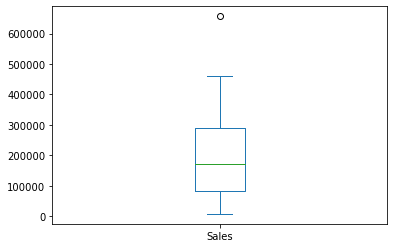

In [65]:
sales['Sales'].plot(kind='box')

<AxesSubplot:>

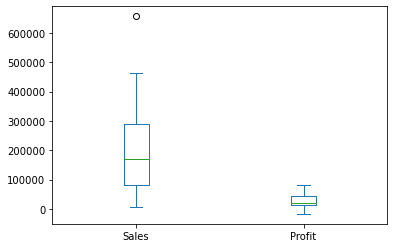

In [67]:
sales[['Sales', 'Profit']].plot(kind='box')

Sales        AxesSubplot(0.125,0.125;0.352273x0.755)
Profit    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

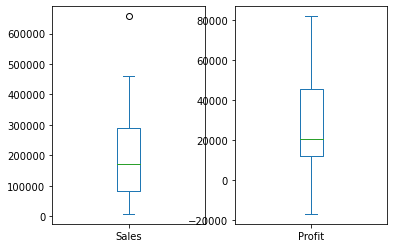

In [68]:
sales[['Sales', 'Profit']].plot(kind='box', subplots=True)

In [69]:
sales['Profit']

Market        Region           
Africa        Western Africa      -12901.51
              Southern Africa      11768.58
              North Africa         21643.08
              Eastern Africa        8013.04
              Central Africa       15606.30
Asia Pacific  Western Asia        -16766.90
              Southern Asia        67998.76
              Southeastern Asia    20948.84
              Oceania              54734.02
              Eastern Asia         72805.10
              Central Asia         -2649.76
Europe        Western Europe       82091.27
              Southern Europe      18911.49
              Northern Europe      43237.44
              Eastern Europe       25050.69
LATAM         South America        12377.59
              Central America      74679.54
              Caribbean            13529.59
USCA          Western US           44303.65
              Southern US          19991.83
              Eastern US           47462.04
              Central US           33697.43


# Indexing and Slicing

In [154]:
sales = pd.read_excel(sales_excel)
sales

,Market,Region,No_of_Orders,Profit,Sales
0,Africa,Western Africa,251,-12901.51,78476.06
1,Africa,Southern Africa,85,11768.58,51319.50
2,Africa,North Africa,182,21643.08,86698.89
3,Africa,Eastern Africa,110,8013.04,44182.60
4,Africa,Central Africa,103,15606.30,61689.99
5,Asia Pacific,Western Asia,382,-16766.90,124312.24
6,Asia Pacific,Southern Asia,469,67998.76,351806.60
7,Asia Pacific,Southeastern Asia,533,20948.84,329751.38
8,Asia Pacific,Oceania,646,54734.02,408002.98
9,Asia Pacific,Eastern Asia,414,72805.10,315390.77


In [73]:
# Set second column as index
sales = pd.read_excel(sales_excel, index_col=[1])
sales

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99
Western Asia,Asia Pacific,382,-16766.90,124312.24
Southern Asia,Asia Pacific,469,67998.76,351806.60
Southeastern Asia,Asia Pacific,533,20948.84,329751.38
Oceania,Asia Pacific,646,54734.02,408002.98


In [74]:
# Get Column
sales['Sales']

Region
Western Africa        78476.06
Southern Africa       51319.50
North Africa          86698.89
Eastern Africa        44182.60
Central Africa        61689.99
Western Asia         124312.24
Southern Asia        351806.60
Southeastern Asia    329751.38
Oceania              408002.98
Eastern Asia         315390.77
Central Asia           8190.74
Western Europe       656637.14
Southern Europe      215703.93
Northern Europe      252969.09
Eastern Europe       108258.93
South America        210710.49
Central America      461670.28
Caribbean            116333.05
Western US           251991.83
Southern US          148771.91
Eastern US           264973.98
Central US           170416.31
Canada                26298.81
Name: Sales, dtype: float64

In [80]:
#another way to access column
sales.Sales

Region
Western Africa        78476.06
Southern Africa       51319.50
North Africa          86698.89
Eastern Africa        44182.60
Central Africa        61689.99
Western Asia         124312.24
Southern Asia        351806.60
Southeastern Asia    329751.38
Oceania              408002.98
Eastern Asia         315390.77
Central Asia           8190.74
Western Europe       656637.14
Southern Europe      215703.93
Northern Europe      252969.09
Eastern Europe       108258.93
South America        210710.49
Central America      461670.28
Caribbean            116333.05
Western US           251991.83
Southern US          148771.91
Eastern US           264973.98
Central US           170416.31
Canada                26298.81
Name: Sales, dtype: float64

In [84]:
#Get two column
two_clm = sales[['Sales', 'Profit']]
two_clm

,Sales,Profit
Region,,
Western Africa,78476.06,-12901.51
Southern Africa,51319.50,11768.58
North Africa,86698.89,21643.08
Eastern Africa,44182.60,8013.04
Central Africa,61689.99,15606.30
Western Asia,124312.24,-16766.90
Southern Asia,351806.60,67998.76
Southeastern Asia,329751.38,20948.84
Oceania,408002.98,54734.02


In [85]:
type(two_clm)

pandas.core.frame.DataFrame

In [76]:
type(sales['Sales'])

pandas.core.series.Series

### Pandas Series
If we extract any one column, then the datatype is a "Series".

In [79]:
sal_clm = sales['Sales']
type(sal_clm)

pandas.core.series.Series

## Row Indexing
### loc and iloc

- dataframe.loc[[list_of_row_labels], [list_of_column_labels]]
- dataframe.iloc[rows, columns]


In [90]:
sales.head(3)

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89


In [89]:
#Display data for 'Southern Asia'
sales.loc['Southern Asia'] #loc take the row index and column index

Market          Asia Pacific
No_of_Orders             469
Profit              67998.76
Sales               351806.6
Name: Southern Asia, dtype: object

In [91]:
#Display Sales data for 'Southern Asia'
sales.loc['Southern Asia', 'Sales']

351806.6

In [92]:
#iloc take row number and column number also
sales.iloc[6]

Market          Asia Pacific
No_of_Orders             469
Profit              67998.76
Sales               351806.6
Name: Southern Asia, dtype: object

In [93]:
sales.iloc[6,3]

351806.6

### Display data for Market, Sales, Profit.

In [95]:
sales.loc[:, ["Market", "Sales", "Profit"]].head() # : for all rows.

,Market,Sales,Profit
Region,,,
Western Africa,Africa,78476.06,-12901.51
Southern Africa,Africa,51319.50,11768.58
North Africa,Africa,86698.89,21643.08
Eastern Africa,Africa,44182.60,8013.04
Central Africa,Africa,61689.99,15606.30


In [97]:
sales.iloc[:, [0,3,2]].head()

,Market,Sales,Profit
Region,,,
Western Africa,Africa,78476.06,-12901.51
Southern Africa,Africa,51319.50,11768.58
North Africa,Africa,86698.89,21643.08
Eastern Africa,Africa,44182.60,8013.04
Central Africa,Africa,61689.99,15606.30


## Condition to filter the data

In [98]:
sales.head()

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Africa,Africa,251,-12901.51,78476.06
Southern Africa,Africa,85,11768.58,51319.50
North Africa,Africa,182,21643.08,86698.89
Eastern Africa,Africa,110,8013.04,44182.60
Central Africa,Africa,103,15606.30,61689.99


In [99]:
#Sales larger than 300000
sales[sales["Sales"] > 300000]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Southern Asia,Asia Pacific,469,67998.76,351806.60
Southeastern Asia,Asia Pacific,533,20948.84,329751.38
Oceania,Asia Pacific,646,54734.02,408002.98
Eastern Asia,Asia Pacific,414,72805.10,315390.77
Western Europe,Europe,964,82091.27,656637.14
Central America,LATAM,930,74679.54,461670.28


In [100]:
#Display the LATAM and Eruopean countries with sales > 250000
#sales[(<condition1>) & (condition2)]

sales[(sales['Market'].isin(['LATAM', 'Europe'])) & (sales['Sales'] > 250000)]

,Market,No_of_Orders,Profit,Sales
Region,,,,
Western Europe,Europe,964,82091.27,656637.14
Northern Europe,Europe,367,43237.44,252969.09
Central America,LATAM,930,74679.54,461670.28


### Case Study Example Using Filter Data

In [103]:
data = pd.read_csv('data/weatherdata.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
dtypes: float64(6), object(3)
memory usage: 9.8+ MB


In [106]:
#Find the days which has sunshine for more than 4 hours
data['Sunshine'] >4

0         False
1         False
2         False
3         False
4         False
          ...  
142188    False
142189    False
142190    False
142191    False
142192    False
Name: Sunshine, Length: 142193, dtype: bool

In [107]:
data[data['Sunshine'] >4]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
5939,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0
5940,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0
5941,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,30.0
5942,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0
5943,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0
...,...,...,...,...,...,...,...,...,...
139108,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0
139109,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0
139110,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0
139111,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0


#### Note: High sunshine corresponds to low rainfall.

## Create New Columns

### Extract day, month, years from date.

In [108]:
#DatetimeIndex - It helps to extract day, month, years from date.

pd.DatetimeIndex(data['Date'])

DatetimeIndex(['2008-12-01', '2008-12-02', '2008-12-03', '2008-12-04',
               '2008-12-05', '2008-12-06', '2008-12-07', '2008-12-08',
               '2008-12-09', '2008-12-10',
               ...
               '2017-06-15', '2017-06-16', '2017-06-17', '2017-06-18',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-24'],
              dtype='datetime64[ns]', name='Date', length=142193, freq=None)

In [109]:
#Get Years
pd.DatetimeIndex(data['Date']).year

Int64Index([2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008, 2008,
            ...
            2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017, 2017],
           dtype='int64', name='Date', length=142193)

In [113]:
#Add new column Year
data['Year'] = pd.DatetimeIndex(data['Date']).year

In [114]:
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008


In [116]:
#Add new column Month
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12


In [118]:
#Add new column Day
data['Day'] = pd.DatetimeIndex(data['Date']).day
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3


In [119]:
#Add new column TempInFahrenheit
data['MaxTemp_F'] = data['MaxTemp'] * 9/5 + 32
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,Day,MaxTemp_F
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,73.22
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,77.18
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,78.26


# Lambda functions

We can use the apply() method.

In [120]:
#Example: Highlights the day which has heavy rainfall
data['Rainfall']

0         0.6
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
142188    0.0
142189    0.0
142190    0.0
142191    0.0
142192    0.0
Name: Rainfall, Length: 142193, dtype: float64

In [122]:
#data['Rainfall'].apply(<lambda function>)
data['is_rainy'] = data['Rainfall'].apply(lambda x: 'Rainy' if x>50 else 'Not Rainy')
data.head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,Day,MaxTemp_F,is_rainy
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12,1,73.22,Not Rainy
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12,2,77.18,Not Rainy
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12,3,78.26,Not Rainy
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,2008,12,4,82.40,Not Rainy
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,2008,12,5,90.14,Not Rainy


In [124]:
data[data['is_rainy'] == 'Rainy'].head(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month,Day,MaxTemp_F,is_rainy
429,2010-02-05,Albury,19.2,26.1,52.2,NaN,NaN,SE,33.0,2010,2,5,78.98,Rainy
455,2010-03-08,Albury,18.1,25.5,66.0,NaN,NaN,NW,56.0,2010,3,8,77.90,Rainy
690,2010-10-31,Albury,13.8,18.7,50.8,NaN,NaN,NNW,52.0,2010,10,31,65.66,Rainy
704,2010-11-14,Albury,19.2,22.6,52.6,NaN,NaN,N,26.0,2010,11,14,72.68,Rainy
787,2011-02-05,Albury,20.4,23.0,99.2,NaN,NaN,NW,28.0,2011,2,5,73.40,Rainy


# Groupby and Aggregate Functions

### groupby() function

A grouping analysis can be thought of as having the following three parts:

- Splitting the data into groups (e.g., groups of location, year, and month)
- Applying a function on each group (e.g., mean, max, and min)
- Combining the results into a data structure showing summary statistics

In [126]:
#Example: Find the location which has most amount of rain.
data = pd.read_csv('data/weatherdata.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0


In [130]:
# Group data by location and other column can be combine into single value mean.
data_by_location = data.groupby(by=['Location']).mean()

In [131]:
data_by_location.head(3)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed
Location,,,,,,
Adelaide,12.628368,22.945402,1.572185,5.824924,7.752002,36.530812
Albany,12.948461,20.072587,2.255073,4.207273,6.658765,NaN
Albury,9.520899,22.630963,1.925710,NaN,NaN,32.953016


In [133]:
#Sort data by rainfall
data_by_location.sort_values('Rainfall', ascending=False).head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed
Location,,,,,,
Cairns,21.199197,29.544344,5.765317,6.211976,7.575995,38.067991
Darwin,23.210530,32.540977,5.094048,6.319089,8.499310,40.582355
CoffsHarbour,14.365774,23.915575,5.054592,3.904267,7.362374,39.232197
GoldCoast,17.341490,25.752971,3.728933,NaN,NaN,42.472539
Wollongong,14.949058,21.476510,3.589127,NaN,NaN,45.695257


#### Note: The highest Rainfall happen in Cairns and Darwin.

# Merging DataFrames
- dataframe_1.merge(dataframe_2, on = ['column_1', 'column_2'], how = '____')
- Merge and concatenate multiple DataFrames

In [135]:
sales = pd.read_csv('data/junesales.csv', header=0)
sales.head()

,Date,Tea_sales(in 100's)
0,6/1/2011,26
1,6/2/2011,35
2,6/3/2011,37
3,6/4/2011,33
4,6/5/2011,25


In [136]:
data = pd.read_csv('data/weatherdata.csv', header=0)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0


## To merge the two dataframe, there should be a one common column.

In [138]:
#Add Month column in Sales data.
sales['Month'] = pd.DatetimeIndex(sales['Date']).month
sales.head(3)

,Date,Tea_sales(in 100's),Month
0,6/1/2011,26,6
1,6/2/2011,35,6
2,6/3/2011,37,6


In [139]:
#Add Month column in weather data.
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,12


In [141]:
#Now merge both based on Month column
merge_data = data.merge(sales, on='Month')
merge_data.head(5)

,Date_x,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month,Date_y,Tea_sales(in 100's)
0,2009-06-01,Albury,8.0,14.3,1.2,NaN,NaN,SE,13.0,6,6/1/2011,26
1,2009-06-01,Albury,8.0,14.3,1.2,NaN,NaN,SE,13.0,6,6/2/2011,35
2,2009-06-01,Albury,8.0,14.3,1.2,NaN,NaN,SE,13.0,6,6/3/2011,37
3,2009-06-01,Albury,8.0,14.3,1.2,NaN,NaN,SE,13.0,6,6/4/2011,33
4,2009-06-01,Albury,8.0,14.3,1.2,NaN,NaN,SE,13.0,6,6/5/2011,25


## Types of Joins In Merging
- INNER JOIN
- LEFT JOIN
- RIGHT JOIN
- FULL JOIN

In [143]:
merge_data = data.merge(sales, on='Month', how='left')
merge_data.head(5)

,Date_x,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Month,Date_y,Tea_sales(in 100's)
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,12,NaN,NaN
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,12,NaN,NaN
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,12,NaN,NaN
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,12,NaN,NaN
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,12,NaN,NaN


# Pivot Table
A pivot table is quite a useful tool to represent a DataFrame in a structured and simplified manner. It acts as an alternative to the groupby() function in Pandas. Pivot tables provide excel-like functionalities to create aggregate tables. 

In [148]:
data = pd.read_csv('data/weatherdata.csv', header=0)
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = pd.DatetimeIndex(data['Date']).month
data.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,2008,12


In [149]:
data_2016 = data[data['Year'] == 2016]
data_2016.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,Year,Month
2474,2016-01-01,Albury,20.4,37.6,0.0,NaN,NaN,ENE,54.0,2016,1
2475,2016-01-02,Albury,20.9,33.6,0.4,NaN,NaN,SSE,50.0,2016,1
2476,2016-01-03,Albury,18.4,23.1,2.2,NaN,NaN,ENE,48.0,2016,1
2477,2016-01-04,Albury,17.3,23.7,15.6,NaN,NaN,SSE,39.0,2016,1
2478,2016-01-05,Albury,15.5,22.9,6.8,NaN,NaN,ENE,31.0,2016,1


In [150]:
#Create Pivot Table
data_2016.pivot_table(index='Location', columns='Month', values='Rainfall', aggfunc='mean')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Location,,,,,,,,,,,,
Adelaide,1.703226,0.634483,1.735484,0.320000,2.838710,3.173333,3.612903,1.896774,4.373333,2.612903,1.106667,2.800000
Albany,2.380645,0.748276,1.144828,3.153333,3.158065,4.010000,3.954839,3.777419,3.426667,2.025806,0.753333,0.650000
Albury,2.206452,1.013793,0.961290,0.546667,3.477419,2.866667,3.767742,2.400000,4.740000,1.980645,1.653333,0.735484
AliceSprings,1.290323,0.910345,0.522581,0.000000,1.832258,0.933333,0.000000,0.658065,1.640000,0.109677,0.233333,4.352000
BadgerysCreek,5.012903,0.441379,1.019355,0.346667,0.380645,8.346667,1.438710,1.890323,1.826667,0.458065,0.337931,0.728571
Ballarat,1.358621,0.355556,1.180645,0.460000,2.303226,2.353333,3.012903,2.051613,5.940000,3.303226,1.133333,0.890323
Bendigo,1.117241,0.162963,1.077419,0.493333,2.677419,1.913333,2.961290,2.612903,5.113333,1.883871,1.253333,0.941935
Brisbane,0.972414,0.523077,3.787097,0.426667,0.890323,8.826667,0.909677,1.019355,1.726667,0.974194,0.933333,3.290323
Cairns,9.316129,4.689655,8.329032,4.593103,9.336842,2.220000,2.741935,1.348387,4.500000,2.427273,0.765217,4.033333
